# OLD

In [184]:
subtests = ['dots-comparison','match-sample','match-sample-rotate','match-points-number','symbolic-magnitude','numeric-line','counting','counting-true','simple-arithmetic-plus','simple-arithmetic-minus']

prettify_subtest = {}
for subtest in subtests:
    prettify_subtest[subtest] = subtest.replace('-', ' ').title()

prettify_subtest["counting"] = "Counting Forward"
prettify_subtest["counting-true"] = "Counting Backward"

In [185]:
rows = [prettify_subtest[subtest] for subtest in subtests]
cols = [f"{age} y/o RT mean" for age in range(5,9)] + [f"{age} y/o RT std" for age in range(5,9)]
cols.sort()
df_rt_age = pd.DataFrame(index=rows, columns=cols)

In [186]:
for subtest in subtests:
    for age in range(5,9):
        df_rt_age.loc[prettify_subtest[subtest], f"{age} y/o RT mean"] = df.loc[df.age // 365.25 == float(age), f"{subtest}_RT"].mean()
        df_rt_age.loc[prettify_subtest[subtest], f"{age} y/o RT std"] = df.loc[df.age // 365.25 == float(age), f"{subtest}_RT"].std()

In [187]:
df_rt_age.to_excel('df_rt_age.xlsx', index = True, float_format='%.2f')

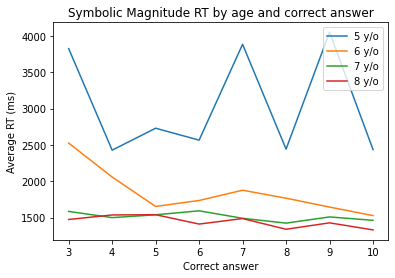

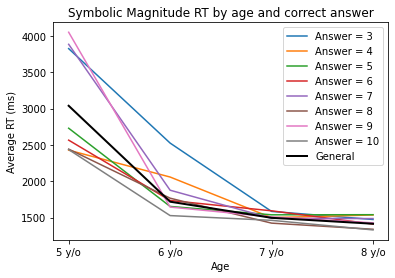

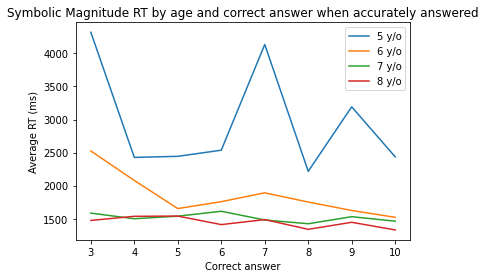

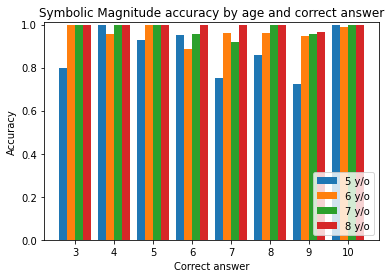

In [188]:
specific_analysis("Symbolic Magnitude")

# Dots Comparison

### Dots Comparison RT

In [189]:
rows = [correct for correct in range(3,11)] + ["General"]
cols = [f"{age} y/o RT mean" for age in range(5,9)] + [f"{age} y/o RT std" for age in range(5,9)] + [f"{age} y/o N" for age in range(5,9)]
cols.sort()
df_dots_comparison_rt_age_correct = pd.DataFrame(index=rows, columns=cols)

In [190]:
x = np.array([])

for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    for correct in range(3,11):
        correct_RTs = np.array([])
        for i in range(1,11):
            correct_RTs = np.concatenate([correct_RTs, df_reduced.loc[df_reduced[f"dots-comparison_{i}_correct_answer"] == correct, f"dots-comparison_{i}_time"].to_numpy()])
        df_dots_comparison_rt_age_correct.loc[correct, f"{age} y/o RT mean"] = correct_RTs.mean()
        df_dots_comparison_rt_age_correct.loc[correct, f"{age} y/o RT std"] = correct_RTs.std()
        df_dots_comparison_rt_age_correct.loc[correct, f"{age} y/o N"] = len(correct_RTs)
    
    correct_RTs_general = np.array([])
    for i in range(1,11):
        correct_RTs_general = np.concatenate([correct_RTs_general, df_reduced.loc[df_reduced[f"dots-comparison_{i}_user_answer"].apply(isnotnan), f"dots-comparison_{i}_time"].to_numpy()])
    df_dots_comparison_rt_age_correct.loc["General", f"{age} y/o RT mean"] = np.nanmean(correct_RTs_general)
    df_dots_comparison_rt_age_correct.loc["General", f"{age} y/o RT std"] = np.nanstd(correct_RTs_general)
    df_dots_comparison_rt_age_correct.loc["General", f"{age} y/o N"] = np.count_nonzero(~np.isnan(correct_RTs_general))

In [191]:
df_dots_comparison_rt_age_correct

,5 y/o N,5 y/o RT mean,5 y/o RT std,6 y/o N,6 y/o RT mean,6 y/o RT std,7 y/o N,7 y/o RT mean,7 y/o RT std,8 y/o N,8 y/o RT mean,8 y/o RT std
3,6,3349.5,1435.388652,15,1939.2,1041.857201,5,1930.0,427.437949,9,1931.666667,516.416068
4,4,2474.25,364.511574,25,2051.08,1122.6339,16,2023.0,1451.9183,11,2151.363636,926.745162
5,15,2839.6,1541.514052,37,2857.648649,2843.649389,11,3042.181818,2352.324878,26,2482.269231,2100.442729
6,16,3837.75,2435.117541,38,2192.0,1731.4331,21,2199.619048,1584.643733,39,2276.384615,1572.941074
7,29,4190.275862,4525.018201,67,3098.865672,3008.366398,28,2903.5,2156.945434,34,2178.705882,1345.554828
8,24,4791.0,3806.487083,60,2603.183333,2765.714877,26,3081.538462,2830.570006,37,2338.783784,2138.009002
9,36,3492.027778,3279.893871,68,3119.25,3664.527272,33,2383.393939,1887.284741,54,2658.203704,2464.344586
10,30,6321.3,14247.138703,80,2936.55,3646.973354,50,2416.4,2173.196751,60,2407.3,2517.172576
General,160,4286.5375,6967.784912,390,2769.851282,3020.907462,190,2539.810526,2133.379127,270,2381.333333,2082.186573


In [192]:
df_dots_comparison_rt_age_correct.to_excel('tables/df_dots_comparison_rt_age_correct.xlsx', index = True, float_format='%.2f')

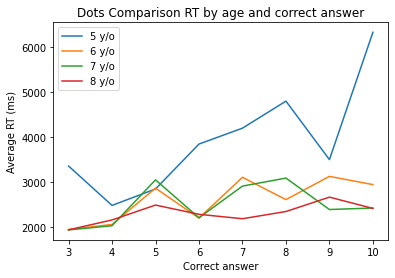

In [193]:
plt.title("Dots Comparison RT by age and correct answer")
plt.xlabel("Correct answer")
plt.ylabel("Average RT (ms)")

for age in range(5,9):
    plt.plot(df_dots_comparison_rt_age_correct.loc[df_dots_comparison_rt_age_correct.index != "General", f"{age} y/o RT mean"], label=f"{age} y/o")

plt.legend()
plt.show

plt.savefig("charts/" + "Dots Comparison RT by age and correct answer".replace(" ", "-").lower() + ".png")

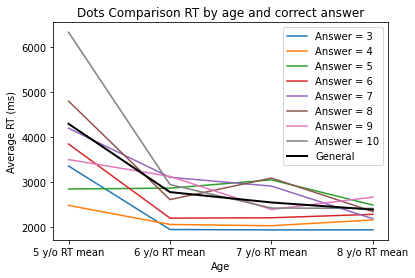

In [194]:
title = "Dots Comparison RT by age and correct answer"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")

for correct in range(3,11):
    plt.plot(df_dots_comparison_rt_age_correct.loc[correct, [f"{age} y/o RT mean" for age in range(5,9)]], label=f"Answer = {correct}")

plt.plot(df_dots_comparison_rt_age_correct.loc["General", [f"{age} y/o RT mean" for age in range(5,9)]], label="General", color="black", linewidth=2)

plt.legend()
plt.show

plt.savefig("charts/" + title.replace(" ", "-").lower() + "-alternative.png")

### Dots Comparison RT when correct

In [195]:
rows = [correct for correct in range(3,11)] + ["General"]
cols = [f"{age} y/o RT mean" for age in range(5,9)] + [f"{age} y/o RT std" for age in range(5,9)] + [f"{age} y/o N" for age in range(5,9)]
cols.sort()
df_dots_comparison_rt_correct_age_correct = pd.DataFrame(index=rows, columns=cols)

In [196]:
for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    for correct in range(3,11):
        correct_RTs = np.array([])
        for i in range(1,11):
            correct_RTs = np.concatenate([correct_RTs, df_reduced.loc[(df_reduced[f"dots-comparison_{i}_correct_answer"] == correct) & (df_reduced[f"dots-comparison_{i}_user_answer"] == correct), f"dots-comparison_{i}_time"].to_numpy()])
        df_dots_comparison_rt_correct_age_correct.loc[correct, f"{age} y/o RT mean"] = correct_RTs.mean()
        df_dots_comparison_rt_correct_age_correct.loc[correct, f"{age} y/o RT std"] = correct_RTs.std()
        df_dots_comparison_rt_correct_age_correct.loc[correct, f"{age} y/o N"] = len(correct_RTs)
    correct_RTs_general = np.array([])
    for i in range(1,11):
        correct_RTs_general = np.concatenate([correct_RTs_general, df_reduced.loc[df_reduced[f"dots-comparison_{i}_correct_answer"] == df_reduced[f"dots-comparison_{i}_user_answer"], f"dots-comparison_{i}_time"].to_numpy()])
    df_dots_comparison_rt_correct_age_correct.loc["General", f"{age} y/o RT mean"] = np.nanmean(correct_RTs_general)
    df_dots_comparison_rt_correct_age_correct.loc["General", f"{age} y/o RT std"] = np.nanstd(correct_RTs_general)
    df_dots_comparison_rt_correct_age_correct.loc["General", f"{age} y/o N"] = len(correct_RTs_general)

In [197]:
df_dots_comparison_rt_correct_age_correct.to_excel('tables/df_dots_comparison_rt_correct_age_correct.xlsx', index = True, float_format='%.2f')

In [198]:
df_dots_comparison_rt_correct_age_correct

,5 y/o N,5 y/o RT mean,5 y/o RT std,6 y/o N,6 y/o RT mean,6 y/o RT std,7 y/o N,7 y/o RT mean,7 y/o RT std,8 y/o N,8 y/o RT mean,8 y/o RT std
3,6,3349.5,1435.388652,15,1939.2,1041.857201,5,1930.0,427.437949,9,1931.666667,516.416068
4,4,2474.25,364.511574,25,2051.08,1122.6339,16,2023.0,1451.9183,11,2151.363636,926.745162
5,15,2839.6,1541.514052,36,2923.361111,2855.0292,11,3042.181818,2352.324878,26,2482.269231,2100.442729
6,14,3779.5,2591.1351,37,2193.216216,1754.658835,21,2199.619048,1584.643733,38,2300.710526,1586.245383
7,26,4357.769231,4748.853014,65,3073.938462,3031.195498,28,2903.5,2156.945434,33,2213.151515,1350.940752
8,22,5058.181818,3866.352164,56,2609.089286,2842.862292,26,3081.538462,2830.570006,36,2397.805556,2137.56051
9,32,3391.65625,3386.721826,67,3134.671642,3689.582245,30,2409.2,1969.227639,53,2674.886792,2484.461603
10,28,5981.428571,14645.422904,72,3087.208333,3806.9073,47,2412.0,2205.077757,57,2408.807018,2575.429696
General,147,4259.156463,7191.760599,373,2801.533512,3072.042616,184,2547.456522,2156.430096,263,2400.920152,2100.579041


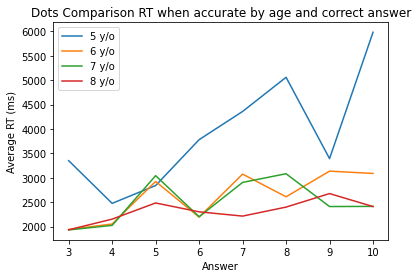

In [199]:
title = "Dots Comparison RT when accurate by age and correct answer"

plt.title(title)
plt.xlabel("Answer")
plt.ylabel("Average RT (ms)")

for age in range(5,9):
    plt.plot(df_dots_comparison_rt_correct_age_correct.loc[df_dots_comparison_rt_correct_age_correct.index != "General", f"{age} y/o RT mean"], label=f"{age} y/o")

plt.legend()
plt.show

plt.savefig("charts/" + title.replace(" ", "-").lower() + ".png")

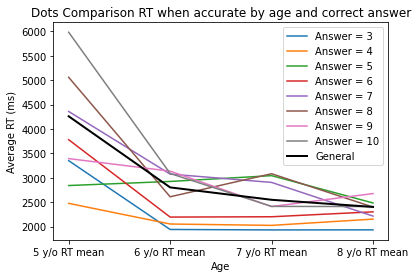

In [200]:
title = "Dots Comparison RT when accurate by age and correct answer"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")

for correct in range(3,11):
    plt.plot(df_dots_comparison_rt_correct_age_correct.loc[correct, [f"{age} y/o RT mean" for age in range(5,9)]], label=f"Answer = {correct}")

plt.plot(df_dots_comparison_rt_correct_age_correct.loc["General", [f"{age} y/o RT mean" for age in range(5,9)]], label="General", color="black", linewidth=2)

plt.legend()
plt.show

plt.savefig("charts/" + title.replace(" ", "-").lower() + "-alternative.png")

### Dots Comparison accuracy

In [201]:
rows = [correct for correct in range(4,11)]
cols = [f"{age} y/o accuracy" for age in range(5,9)] + [f"{age} y/o N" for age in range(5,9)]
cols.sort()
df_dots_comparison_accuracy_age_correct = pd.DataFrame(index=rows, columns=cols)

In [202]:
for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    for correct in range(4,11):
        total_count = 0
        correct_count = 0
        for i in range(1,11):
            df_reduced_reduced = df_reduced.loc[df_reduced[f"dots-comparison_{i}_correct_answer"] == correct]
            total_count += df_reduced_reduced.loc[df_reduced_reduced[f"dots-comparison_{i}_user_answer"].apply(isnotnan)].shape[0]
            correct_count += df_reduced_reduced.loc[df_reduced_reduced[f"dots-comparison_{i}_user_answer"] == correct].shape[0]
        df_dots_comparison_accuracy_age_correct.loc[correct, f"{age} y/o accuracy"] = correct_count / total_count
        df_dots_comparison_accuracy_age_correct.loc[correct, f"{age} y/o N"] = total_count

In [203]:
df_dots_comparison_accuracy_age_correct

,5 y/o N,5 y/o accuracy,6 y/o N,6 y/o accuracy,7 y/o N,7 y/o accuracy,8 y/o N,8 y/o accuracy
4,4,1.0,25,1.0,16,1.0,11,1.0
5,15,1.0,37,0.972973,11,1.0,26,1.0
6,16,0.875,38,0.973684,21,1.0,39,0.974359
7,29,0.896552,67,0.970149,28,1.0,34,0.970588
8,24,0.916667,60,0.933333,26,1.0,37,0.972973
9,36,0.888889,68,0.985294,33,0.909091,54,0.981481
10,30,0.933333,80,0.9,50,0.94,60,0.95


In [204]:
df_dots_comparison_accuracy_age_correct.to_excel('tables/df_dots_comparison_accuracy_age_correct.xlsx', index = True, float_format='%.2f')

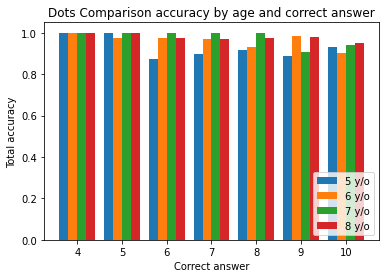

In [205]:
title = "Dots Comparison accuracy by age and correct answer"

plt.title(title)
plt.xlabel("Correct answer")
plt.ylabel("Total accuracy")

x = [correct for correct in range(4,11)]
move = [-0.3,-0.1,0.1,0.3]

for age in range(5,9):
    plt.bar(np.arange(len(x)) + move[age-5], df_dots_comparison_accuracy_age_correct.loc[:, f"{age} y/o accuracy"], width=0.2, label=f"{age} y/o")

plt.xticks(np.arange(len(x)), x)
plt.legend(loc='lower right')

plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + "_bar-.png")

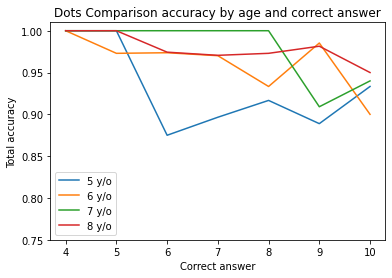

In [206]:
title = "Dots Comparison accuracy by age and correct answer"

plt.title(title)
plt.xlabel("Correct answer")
plt.ylabel("Total accuracy")
plt.ylim(0.75,1.01)

for age in range(5,9):
    plt.plot(df_dots_comparison_accuracy_age_correct.loc[:, f"{age} y/o accuracy"], label=f"{age} y/o")
    
plt.legend()
plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + ".png")

# Match Sample (both)

In [322]:
rows = ["N", "RT mean", "RT std", "N_correct", "RT correct mean", "RT correct std", "accuracy"]
cols = [f"{age} y/o" for age in range(5,9)]
cols.sort()
df_match_sample_age = pd.DataFrame(index=rows, columns=cols)
df_match_sample_rotate_age = pd.DataFrame(index=rows, columns=cols)

### Match Sample

In [323]:
for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    RTs = np.array([])
    RTs_correct = np.array([])
    for i in range(2,11):
        RTs = np.concatenate([RTs, df_reduced.loc[:, f"match-sample_{i}_time"].to_numpy()])
        RTs_correct = np.concatenate([RTs_correct, df_reduced.loc[df_reduced[f"match-sample_{i}_correct_answer"] == df_reduced[f"match-sample_{i}_user_answer"], f"match-sample_{i}_time"].to_numpy()])
    df_match_sample_age.loc["N", f"{age} y/o"] = np.count_nonzero(~np.isnan(RTs))
    df_match_sample_age.loc["RT mean", f"{age} y/o"] = RTs.mean()
    df_match_sample_age.loc["RT std", f"{age} y/o"] = RTs.std()
    df_match_sample_age.loc["RT correct mean", f"{age} y/o"] = RTs_correct.mean()
    df_match_sample_age.loc["RT correct std", f"{age} y/o"] = RTs_correct.std()
    df_match_sample_age.loc["N_correct", f"{age} y/o"] = len(RTs_correct)
    df_match_sample_age.loc["accuracy", f"{age} y/o"] = len(RTs_correct) / np.count_nonzero(~np.isnan(RTs))

In [209]:
df_match_sample_age.to_excel('tables/df_match_sample_rt_age.xlsx', index = True, float_format='%.2f')

In [324]:
df_match_sample_age

,5 y/o,6 y/o,7 y/o,8 y/o
N,144,360,171,252
RT mean,5223.256944,4729.705556,5191.602339,4484.15873
RT std,3525.600354,2906.077548,2574.674763,2245.707943
N_correct,91,238,120,200
RT correct mean,5141.846154,4945.180672,5204.183333,4475.56
RT correct std,3933.321134,2817.80949,2627.766495,1936.545436
accuracy,0.631944,0.661111,0.701754,0.793651


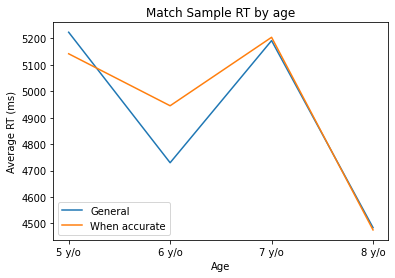

In [211]:
title = "Match Sample RT by age"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")

plt.plot(df_match_sample_age.loc["RT mean", :], label="General")
plt.plot(df_match_sample_age.loc["RT correct mean", :], label="When accurate")
    
plt.legend()
plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + ".png")

In [212]:
X = ['Group A','Group B','Group C','Group D']
X_axis = np.arange(len(X))
X_axis

array([0, 1, 2, 3])

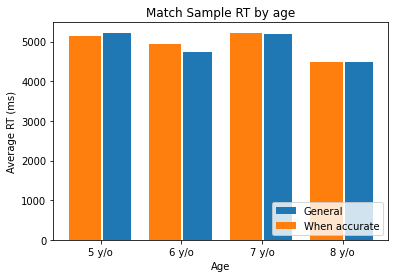

In [213]:
title = "Match Sample RT by age"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")

x = [f"{age} y/o" for age in range(5,9)]

plt.bar(np.arange(len(x)) + 0.2, df_match_sample_age.loc["RT mean", :], 0.35, label="General")
plt.bar(np.arange(len(x)) - 0.2, df_match_sample_age.loc["RT correct mean", :], 0.4, label="When accurate")

plt.xticks(np.arange(len(x)), x)
plt.legend(loc="lower right")

plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + "_bar-.png")

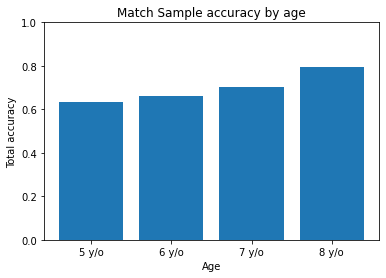

In [214]:
title = "Match Sample accuracy by age"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Total accuracy")

plt.bar([f"{age} y/o" for age in range(5,9)], df_match_sample_age.loc["accuracy", :])
plt.ylim(0,1)

plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + ".png")

### Match Sample Rotate

In [325]:
for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    RTs = np.array([])
    RTs_correct = np.array([])
    for i in range(2,11):
        RTs = np.concatenate([RTs, df_reduced.loc[:, f"match-sample-rotate_{i}_time"].to_numpy()])
        RTs_correct = np.concatenate([RTs_correct, df_reduced.loc[(df_reduced[f"match-sample-rotate_{i}_correct_answer"] == df_reduced[f"match-sample-rotate_{i}_user_answer"]) & (df_reduced[f"match-sample-rotate_{i}_user_answer"].apply(isnotnan)), f"match-sample-rotate_{i}_time"].to_numpy()])
    df_match_sample_rotate_age.loc["N", f"{age} y/o"] = np.count_nonzero(~np.isnan(RTs))
    df_match_sample_rotate_age.loc["RT mean", f"{age} y/o"] = np.nanmean(RTs)
    df_match_sample_rotate_age.loc["RT std", f"{age} y/o"] = np.nanstd(RTs)
    df_match_sample_rotate_age.loc["RT correct mean", f"{age} y/o"] = np.nanmean(RTs_correct)
    df_match_sample_rotate_age.loc["RT correct std", f"{age} y/o"] = np.nanstd(RTs_correct)
    df_match_sample_rotate_age.loc["N_correct", f"{age} y/o"] = len(RTs_correct)
    df_match_sample_rotate_age.loc["accuracy", f"{age} y/o"] = len(RTs_correct) / np.count_nonzero(~np.isnan(RTs))

In [216]:
df_match_sample_rotate_age.to_excel('tables/df_match_sample_rotate_age.xlsx', index = True, float_format='%.2f')

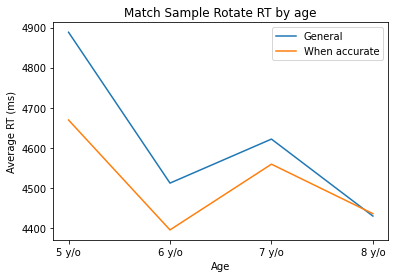

In [217]:
title = "Match Sample Rotate RT by age"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")

plt.plot(df_match_sample_rotate_age.loc["RT mean", :], label="General")
plt.plot(df_match_sample_rotate_age.loc["RT correct mean", :], label="When accurate")
    
plt.legend()
plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + ".png")

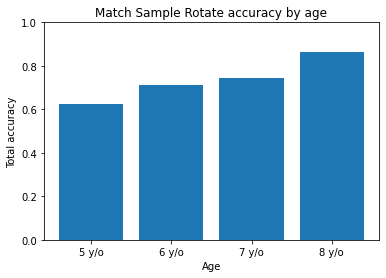

In [218]:
title = "Match Sample Rotate accuracy by age"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Total accuracy")

plt.bar([f"{age} y/o" for age in range(5,9)], df_match_sample_rotate_age.loc["accuracy", :])
plt.ylim(0,1)

plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + ".png")

### Comparison

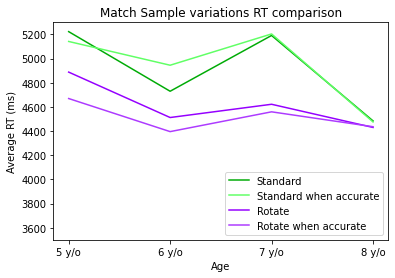

In [327]:
title = "Match Sample variations RT comparison"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")

plt.plot(df_match_sample_age.loc["RT mean", :], label="Standard", color="#00ab06")
plt.plot(df_match_sample_age.loc["RT correct mean", :], label="Standard when accurate", color="#61ff66")
plt.plot(df_match_sample_rotate_age.loc["RT mean", :], label="Rotate", color="#9500ff")
plt.plot(df_match_sample_rotate_age.loc["RT correct mean", :], label="Rotate when accurate", color="#ad3bff")
    
plt.legend(loc="lower right")
plt.show
plt.ylim(3500,5300)

plt.savefig(f"charts/match-sample-variations/" + title.replace(" ", "-").lower() + ".png")

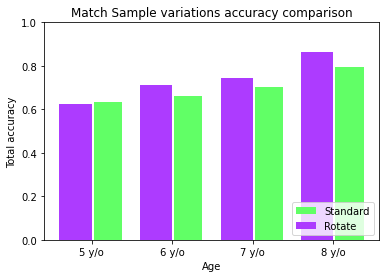

In [326]:
title = "Match Sample variations accuracy comparison"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Total accuracy")

x = [f"{age} y/o" for age in range(5,9)]

plt.bar(np.arange(len(x)) + 0.2, df_match_sample_age.loc["accuracy", :], 0.35, label="Standard", color="#61ff66")
plt.bar(np.arange(len(x)) - 0.2, df_match_sample_rotate_age.loc["accuracy", :], 0.4, label="Rotate", color="#ad3bff")

plt.xticks(np.arange(len(x)), x)
plt.legend(loc="lower right")

plt.ylim(0,1)
plt.show

plt.savefig(f"charts/match-sample-variations/" + title.replace(" ", "-").lower() + "_bar-.png")

# Match Points Number

In [221]:
rows = ["N", "RT mean", "RT std", "N_correct", "RT correct mean", "RT correct std", "accuracy"]
cols = [f"{age} y/o" for age in range(5,9)]
df_match_points_number_age = pd.DataFrame(index=rows, columns=cols)

In [222]:
for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    RTs = np.array([])
    RTs_correct = np.array([])
    for i in range(2,11):
        RTs = np.concatenate([RTs, df_reduced.loc[:, f"match-points-number_{i}_time"].to_numpy()])
        RTs_correct = np.concatenate([RTs_correct, df_reduced.loc[df_reduced[f"match-points-number_{i}_correct_answer"] == df_reduced[f"match-points-number_{i}_user_answer"], f"match-points-number_{i}_time"].to_numpy()])
    df_match_points_number_age.loc["N", f"{age} y/o"] = np.count_nonzero(~np.isnan(RTs))
    df_match_points_number_age.loc["RT mean", f"{age} y/o"] = np.nanmean(RTs)
    df_match_points_number_age.loc["RT std", f"{age} y/o"] = np.nanstd(RTs)
    df_match_points_number_age.loc["RT correct mean", f"{age} y/o"] = np.nanmean(RTs_correct)
    df_match_points_number_age.loc["RT correct std", f"{age} y/o"] = np.nanstd(RTs_correct)
    df_match_points_number_age.loc["N_correct", f"{age} y/o"] = len(RTs_correct)
    df_match_points_number_age.loc["accuracy", f"{age} y/o"] = len(RTs_correct) / np.count_nonzero(~np.isnan(RTs))


In [ ]:
df_match_points_number_age.to_excel('tables/df_match_points_number_age.xlsx', index = True, float_format='%.2f')

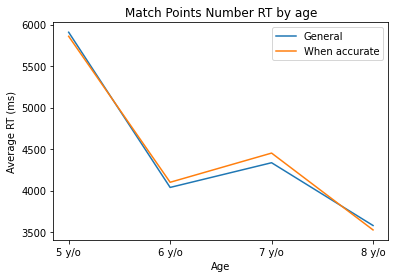

In [ ]:
title = "Match Points Number RT by age"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")

plt.plot(df_match_points_number_age.loc["RT mean", :], label="General")
plt.plot(df_match_points_number_age.loc["RT correct mean", :], label="When accurate")
    
plt.legend()
plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + ".png")

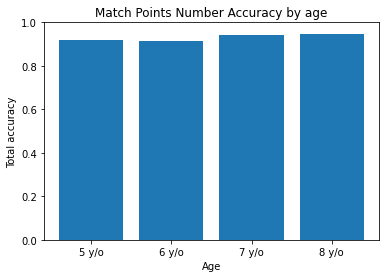

In [223]:
title = "Match Points Number Accuracy by age"

plt.title(title)
plt.xlabel("Age")
plt.ylabel("Total accuracy")

plt.bar([f"{age} y/o" for age in range(5,9)], df_match_points_number_age.loc["accuracy", :])
plt.ylim(0,1)

plt.show

plt.savefig(f"charts/" + title.replace(" ", "-").lower() + ".png")

# Symbolic Magnitude

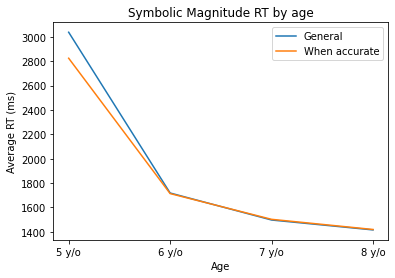

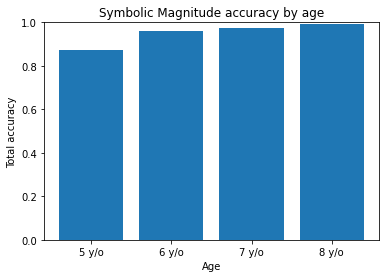

In [224]:
general_analysis("Symbolic Magnitude")

# Counting Forward

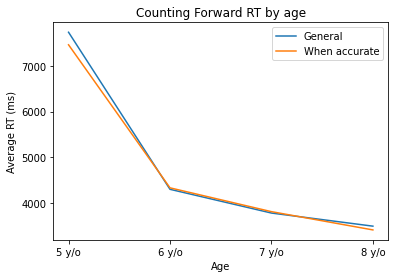

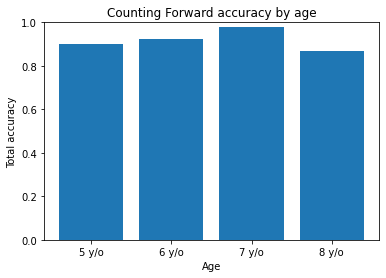

In [225]:
general_analysis("Counting Forward", "counting", end=9)

# Counting Backward

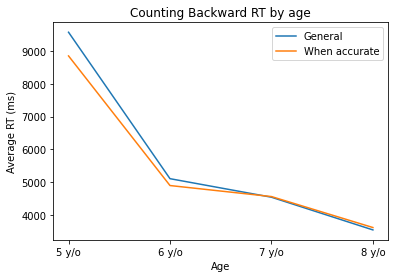

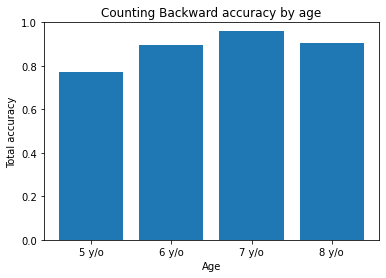

In [226]:
general_analysis("Counting Backward", "counting-true", end=19)

# Simple Arithmetic Plus

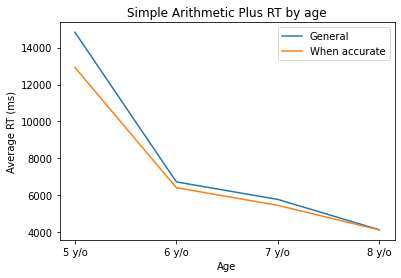

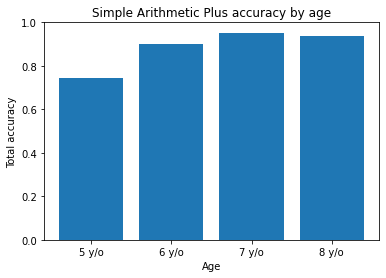

In [227]:
general_analysis("Simple Arithmetic Plus", "simple-arithmetic-plus")

# Simple Aritmetic Minus

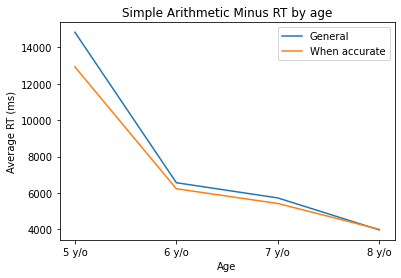

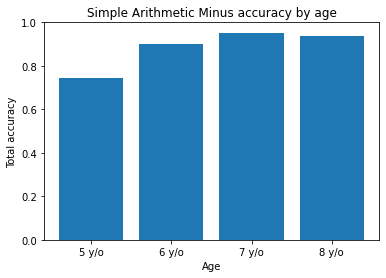

In [228]:
general_analysis("Simple Arithmetic Minus", "simple-arithmetic-minus")

# Compressed

In [360]:
import seaborn as sns
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv('../data.csv')

In [361]:
def isnotnan(x):
    return not np.isnan(x)

In [362]:
def calc_age(row):
    test_date = datetime.strptime(row.loc["test_date"].split('T')[0], "%Y-%m-%d")
    birthdate = datetime.strptime(row.loc["birthdate"].split('T')[0], "%Y-%m-%d")
    age = test_date - birthdate
    return age.days
    
df["age"] = df.apply(calc_age, axis=1)

In [363]:
(df.loc[:, "age"] // 365.25).value_counts()

6.0     40
8.0     28
7.0     19
5.0     16
9.0      3
0.0      2
11.0     1
17.0     1
10.0     1
Name: age, dtype: int64

In [364]:
df = df.loc[(df.age // 365.25 <= 8) & (df.age // 365.25 >= 5)]

In [365]:
df.shape

(103, 498)

In [366]:
def general_analysis(subtest, subtest_lower="", start=1, end=10):
    dir_tables = "tables/" + subtest.replace(" ", "-").lower() + "/"
    dir_charts = "charts/" + subtest.replace(" ", "-").lower() + "/"
    if not os.path.exists(dir_tables):
        os.makedirs(dir_tables)
    if not os.path.exists(dir_charts):
        os.makedirs(dir_charts)
        
    if subtest_lower == "":
        subtest_lower = subtest.replace(" ", "-").lower()

    rows = ["accuracy", "N", "RT mean", "RT std", "N_correct", "RT correct mean", "RT correct std"]
    cols = [f"{age} y/o" for age in range(5,9)]
    df_subtest = pd.DataFrame(index=rows, columns=cols)

    for age in range(5,9):
        df_reduced = df.loc[df.age // 365.25 == float(age)]
        RTs = np.array([])
        RTs_correct = np.array([])
        for i in range(start,end+1):
            RTs = np.concatenate([RTs, df_reduced.loc[:, f"{subtest_lower}_{i}_time"].to_numpy()])
            RTs_correct = np.concatenate([RTs_correct, df_reduced.loc[df_reduced[f"{subtest_lower}_{i}_correct_answer"] == df_reduced[f"{subtest_lower}_{i}_user_answer"], f"{subtest_lower}_{i}_time"].to_numpy()])
        df_subtest.loc["N", f"{age} y/o"] = np.count_nonzero(~np.isnan(RTs))
        df_subtest.loc["RT mean", f"{age} y/o"] = np.nanmean(RTs)
        df_subtest.loc["RT std", f"{age} y/o"] = np.nanstd(RTs)
        df_subtest.loc["RT correct mean", f"{age} y/o"] = np.nanmean(RTs_correct)
        df_subtest.loc["RT correct std", f"{age} y/o"] = np.nanstd(RTs_correct)
        df_subtest.loc["N_correct", f"{age} y/o"] = len(RTs_correct)
        df_subtest.loc["accuracy", f"{age} y/o"] = len(RTs_correct) / np.count_nonzero(~np.isnan(RTs))
        
    df_subtest.to_excel(dir_tables + subtest.replace(' ', '_').lower() + "_general.xlsx", index = True, float_format='%.2f')

    title = subtest + " RT"
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Average RT (ms)")
    plt.plot(df_subtest.loc["RT mean", :], label="General")
    plt.plot(df_subtest.loc["RT correct mean", :], label="When accurate")
    plt.legend()
    plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_general_rt.png")
    plt.show()
    plt.clf()

    title = subtest + " accuracy"
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Total accuracy")
    plt.bar([f"{age} y/o" for age in range(5,9)], df_subtest.loc["accuracy", :])
    plt.ylim(0,1)
    plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_general_accuracy.png")
    plt.show()

In [367]:
def specific_analysis(subtest, subtest_lower="", start=1, end=10):
    dir_tables = "tables/" + subtest.replace(" ", "-").lower() + "/"
    dir_charts = "charts/" + subtest.replace(" ", "-").lower() + "/"
    if not os.path.exists(dir_tables):
        os.makedirs(dir_tables)
    if not os.path.exists(dir_charts):
        os.makedirs(dir_charts)

    if subtest_lower == "":
        subtest_lower = subtest.replace(" ", "-").lower()
    min_answer_value = int(min(df.loc[:,f"{subtest_lower}_{start}_correct_answer"].value_counts().index))
    max_answer_value = int(max(df.loc[:,f"{subtest_lower}_{start}_correct_answer"].value_counts().index))

    rows = [correct for correct in range(min_answer_value, max_answer_value+1)] + ["General"]
    cols = [f"{age} y/o RT mean" for age in range(5,9)] + [f"{age} y/o RT std" for age in range(5,9)] + [f"{age} y/o N" for age in range(5,9)] +[f"{age} y/o RT mean when accurate" for age in range(5,9)] + [f"{age} y/o RT std when accurate" for age in range(5,9)] + [f"{age} y/o N when accurate" for age in range(5,9)] + [f"{age} y/o accuracy" for age in range(5,9)]
    cols.sort()
    df_subtest = pd.DataFrame(index=rows, columns=cols)

    for age in range(5,9):
        df_reduced = df.loc[df.age // 365.25 == float(age)]
        for correct in range(min_answer_value, max_answer_value+1):
            RTs = np.array([])
            RTs_when_accurate = np.array([])
            for i in range(start,end+1):
                RTs = np.concatenate([RTs, df_reduced.loc[df_reduced[f"{subtest_lower}_{i}_correct_answer"] == correct, f"{subtest_lower}_{i}_time"].to_numpy()])
                RTs_when_accurate = np.concatenate([RTs_when_accurate, df_reduced.loc[(df_reduced[f"{subtest_lower}_{i}_correct_answer"] == correct) & (df_reduced[f"{subtest_lower}_{i}_user_answer"] == correct), f"{subtest_lower}_{i}_time"].to_numpy()])
            df_subtest.loc[correct, f"{age} y/o RT mean"] = np.nanmean(RTs)
            df_subtest.loc[correct, f"{age} y/o RT std"] = np.nanstd(RTs)
            df_subtest.loc[correct, f"{age} y/o N"] = np.count_nonzero(~np.isnan(RTs))
            df_subtest.loc[correct, f"{age} y/o RT mean when accurate"] = np.nanmean(RTs_when_accurate)
            df_subtest.loc[correct, f"{age} y/o RT std when accurate"] = np.nanstd(RTs_when_accurate)
            df_subtest.loc[correct, f"{age} y/o N when accurate"] = np.count_nonzero(~np.isnan(RTs_when_accurate))
            if len(RTs > 0):
                df_subtest.loc[correct, f"{age} y/o accuracy"] = np.count_nonzero(~np.isnan(RTs_when_accurate)) / np.count_nonzero(~np.isnan(RTs))
        
        RTs_general = np.array([])
        RTs_general_when_accurate = np.array([])
        for i in range(start,end+1):
            RTs_general = np.concatenate([RTs_general, df_reduced.loc[df_reduced[f"{subtest_lower}_{i}_user_answer"].apply(isnotnan), f"{subtest_lower}_{i}_time"].to_numpy()])
            RTs_general_when_accurate = np.concatenate([RTs_general_when_accurate, df_reduced.loc[(df_reduced[f"{subtest_lower}_{i}_user_answer"] == df_reduced[f"{subtest_lower}_{i}_correct_answer"]) & (df_reduced[f"{subtest_lower}_{i}_user_answer"].apply(isnotnan)), f"{subtest_lower}_{i}_time"].to_numpy()])
        df_subtest.loc["General", f"{age} y/o RT mean"] = np.nanmean(RTs_general)
        df_subtest.loc["General", f"{age} y/o RT std"] = np.nanstd(RTs_general)
        df_subtest.loc["General", f"{age} y/o N"] = np.count_nonzero(~np.isnan(RTs_general))
        df_subtest.loc["General", f"{age} y/o RT mean when accurate"] = np.nanmean(RTs_general_when_accurate)
        df_subtest.loc["General", f"{age} y/o RT std when accurate"] = np.nanstd(RTs_general_when_accurate)
        df_subtest.loc["General", f"{age} y/o N when accurate"] = np.count_nonzero(~np.isnan(RTs_general_when_accurate))
        if (np.count_nonzero(~np.isnan(RTs_general)) > 0):
            df_subtest.loc["General", f"{age} y/o accuracy"] = np.count_nonzero(~np.isnan(RTs_general_when_accurate)) / np.count_nonzero(~np.isnan(RTs_general))

    # ALL ANSWERS RT
    plt.title(f"{subtest} RT")
    plt.xlabel("Correct answer")
    plt.ylabel("Average RT (ms)")
    for age in range(5,9):
        data = df_subtest.loc[(df_subtest.index != "General") & (df_subtest.index != "General when accurate"), f"{age} y/o RT mean"]
        data.name = data.name[:5]
        plt.plot(data, label=f"{age} y/o")
    plt.legend()
    plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_all_answers_rt.png")
    plt.show()
    plt.clf()
    
    # ALL ANSWERS RT ALTERNATIVE 
    plt.title(f"{subtest} RT")
    plt.xlabel("Age")
    plt.ylabel("Average RT (ms)")
    for correct in range(min_answer_value,max_answer_value+1):
        data = df_subtest.loc[correct, [f"{age} y/o RT mean" for age in range(5,9)]]
        plt.plot([age_idx[:5] for age_idx in data.index], data.values, label=f"Answer = {correct}")
    data_general = df_subtest.loc["General", [f"{age} y/o RT mean" for age in range(5,9)]]
    plt.plot([age_idx[:5] for age_idx in data_general.index], data_general.values, label="General", color="black", linewidth=2)
    plt.legend()
    plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_all_answers_rt_alternative.png")
    plt.show()
    plt.clf()

    cols_all_answers = [f"{age} y/o RT mean" for age in range(5,9)] + [f"{age} y/o RT std" for age in range(5,9)] + [f"{age} y/o N" for age in range(5,9)]
    df_subtest_all_answers = df_subtest.loc[:, cols_all_answers]
    df_subtest_all_answers.reindex(sorted(df_subtest_all_answers.columns), axis=1).to_excel(f'{dir_tables}{subtest_lower}_specific_all_answers_rt.xlsx', index = True, float_format='%.2f')

    # ACCURATE ANSWERS
    plt.title(f"{subtest} RT when accurately answered")
    plt.xlabel("Correct answer")
    plt.ylabel("Average RT (ms)")
    for age in range(5,9):
        plt.plot(df_subtest.loc[(df_subtest.index != "General") & (df_subtest.index != "General when accurate"), f"{age} y/o RT mean when accurate"], label=f"{age} y/o")
    plt.legend()
    plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_accurate_answers_rt.png")
    plt.show()
    plt.clf()

    # ACCURATE ANSWERS ALTERNATIVE
    plt.title(f"{subtest} RT")
    plt.xlabel("Age")
    plt.ylabel("Average RT (ms)")
    for correct in range(min_answer_value,max_answer_value+1):
        data = df_subtest.loc[correct, [f"{age} y/o RT mean when accurate" for age in range(5,9)]]
        plt.plot([age_idx[:5] for age_idx in data.index], data.values, label=f"Answer = {correct}")
    data_general = df_subtest.loc["General", [f"{age} y/o RT mean when accurate" for age in range(5,9)]]
    plt.plot([age_idx[:5] for age_idx in data_general.index], data_general.values, label="General", color="black", linewidth=2)
    plt.legend()
    plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_accurate_answers_rt_alternative.png")
    plt.show()
    plt.clf()

    cols_accurate_answers = [f"{age} y/o RT mean when accurate" for age in range(5,9)] + [f"{age} y/o RT std when accurate" for age in range(5,9)] + [f"{age} y/o N when accurate" for age in range(5,9)]
    df_subtest_accurate_answers = df_subtest.loc[:, cols_accurate_answers]
    df_subtest_accurate_answers.reindex(sorted(df_subtest_accurate_answers.columns), axis=1).to_excel(f'{dir_tables}{subtest_lower}_specific_accurate_answers_rt.xlsx', index = True, float_format='%.2f')

    # ACCURACY
    plt.title(f"{subtest} accuracy")
    plt.xlabel("Correct answer")
    plt.ylabel("Accuracy")
    plt.ylim(0,1.01)
    x = [correct for correct in range(min_answer_value,max_answer_value+1)]
    move = [-0.3,-0.1,0.1,0.3]
    for age in range(5,9):
        plt.bar(np.arange(len(x)) + move[age-5], df_subtest.loc[(df_subtest.index != "General") & (df_subtest.index != "General when accurate"), f"{age} y/o accuracy"], width=0.2, label=f"{age} y/o")
    plt.xticks(np.arange(len(x)), x)
    plt.legend(loc='lower right')
    plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_accuracy.png")
    plt.show()
    cols_accurate_answers = [f"{age} y/o accuracy" for age in range(5,9)]
    df_subtest_accurate_answers = df_subtest.loc[:, cols_accurate_answers]
    df_subtest_accurate_answers.reindex(sorted(df_subtest_accurate_answers.columns), axis=1).to_excel(f'{dir_tables}{subtest_lower}_specific_accuracy.xlsx', index = True, float_format='%.2f')


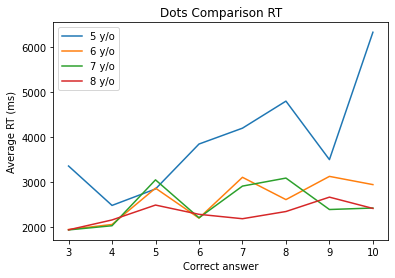

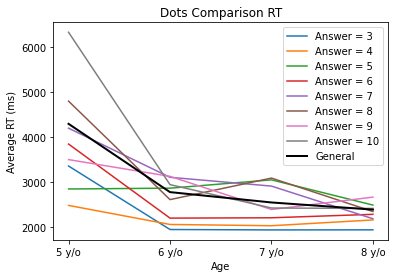

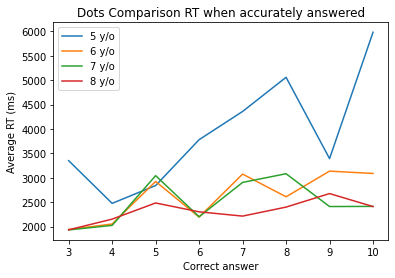

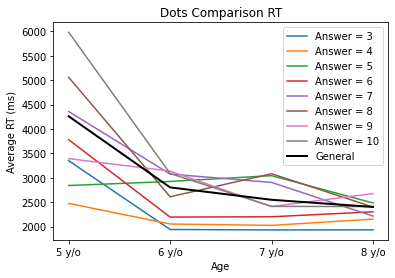

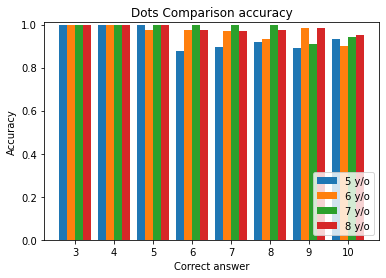

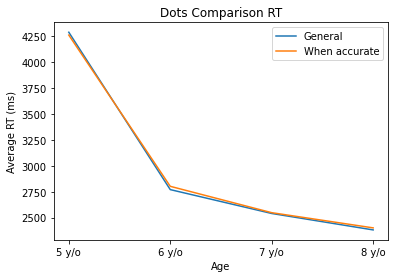

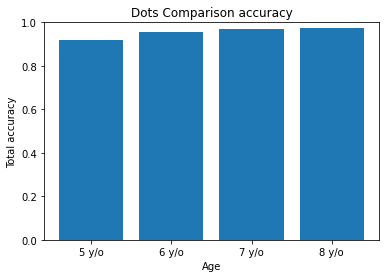

In [368]:
# ['dots-comparison','match-sample','match-sample-rotate','match-points-number','symbolic-magnitude','numeric-line','counting','counting-true','simple-arithmetic-plus','simple-arithmetic-minus']

specific_analysis("Dots Comparison")
general_analysis("Dots Comparison")

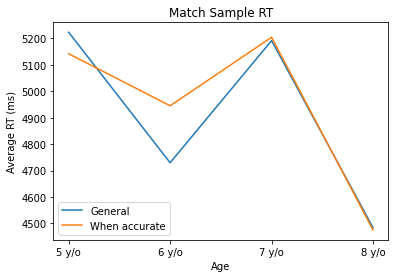

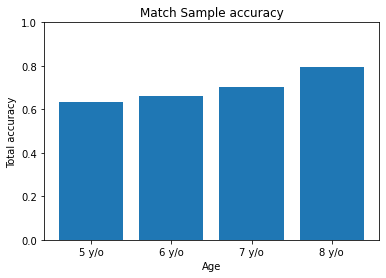

In [369]:
general_analysis("Match Sample", start=2)

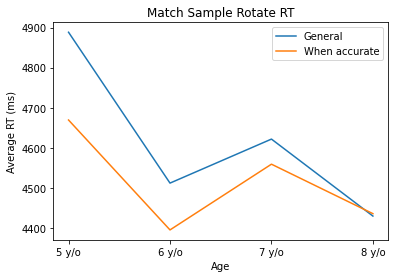

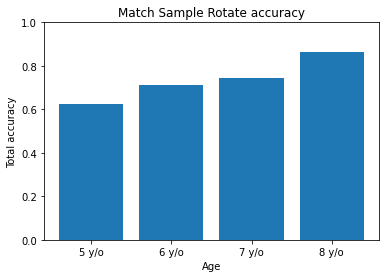

In [370]:
general_analysis("Match Sample Rotate", start=2)

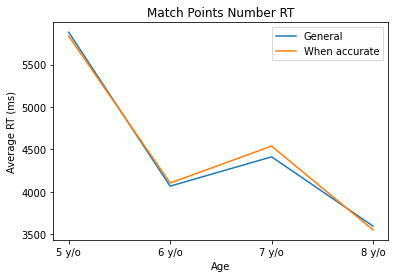

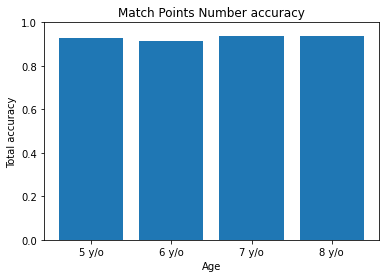

In [371]:
general_analysis("Match Points Number")

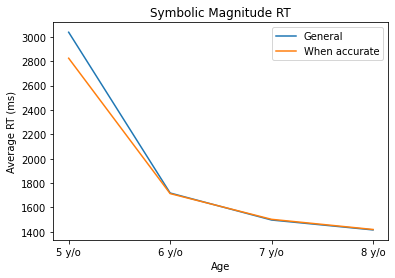

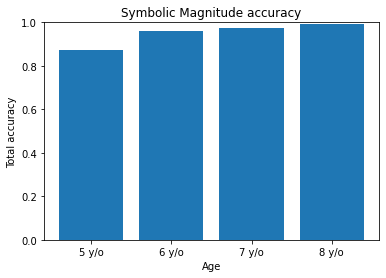

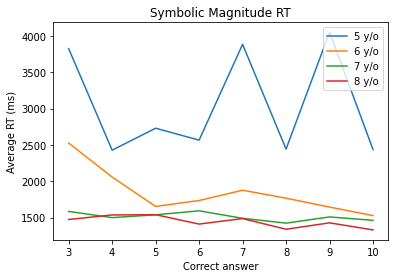

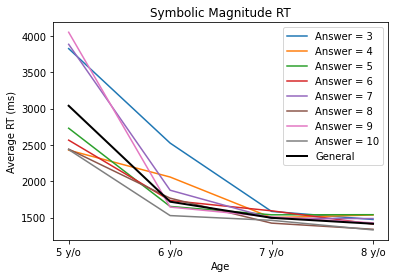

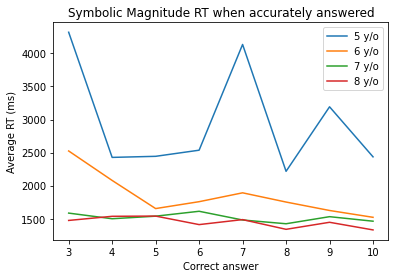

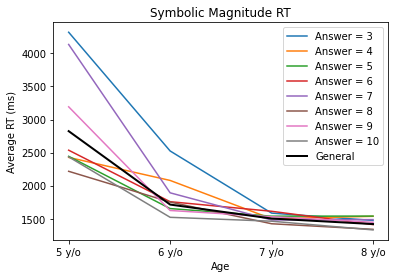

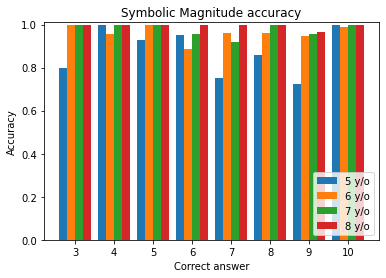

In [372]:
general_analysis("Symbolic Magnitude")
specific_analysis("Symbolic Magnitude")

In [373]:
import math
for i in range(1,9):
    df.loc[df[f"counting_{i}_correct_answer"] == 10, f"counting_{i}_correct_answer"] = math.nan
for i in range(1,19):
    df.loc[df[f"counting-true_{i}_correct_answer"] == 10, f"counting-true_{i}_correct_answer"] = math.nan

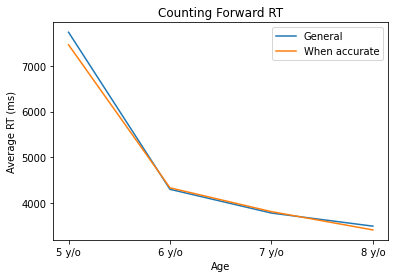

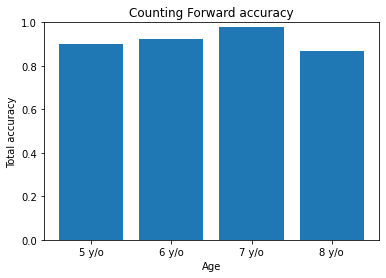

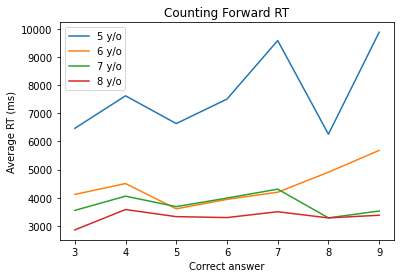

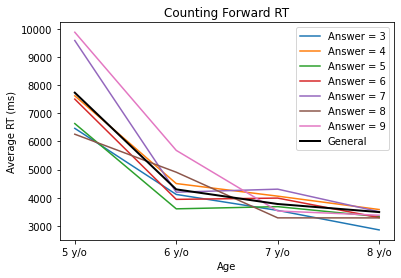

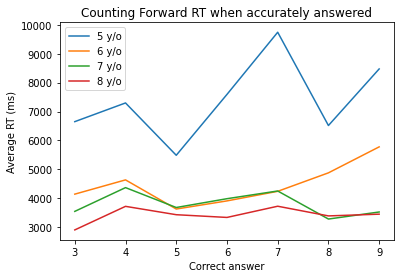

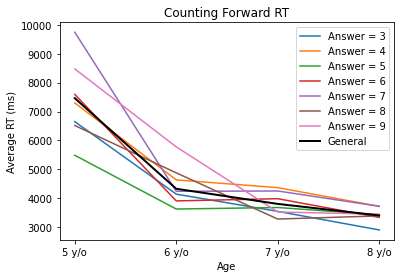

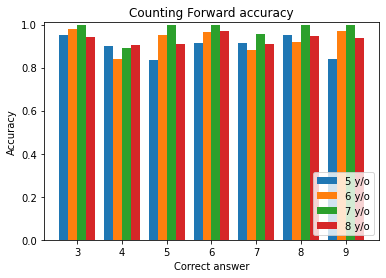

In [374]:
general_analysis("Counting Forward", "counting", end=9)
specific_analysis("Counting Forward", "counting", end=9)

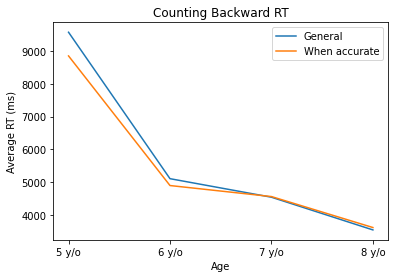

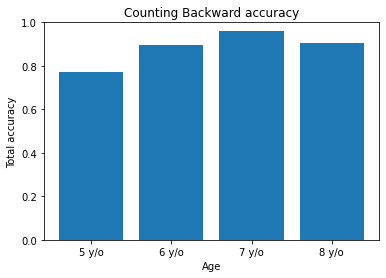

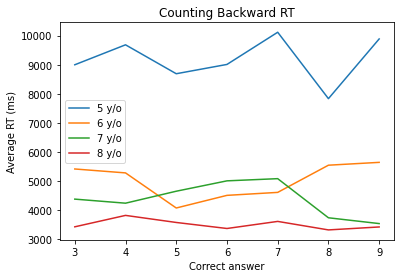

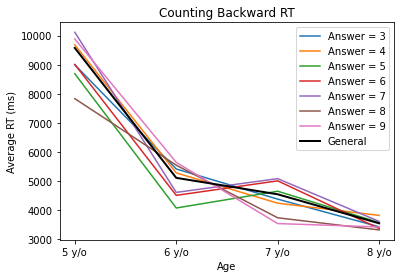

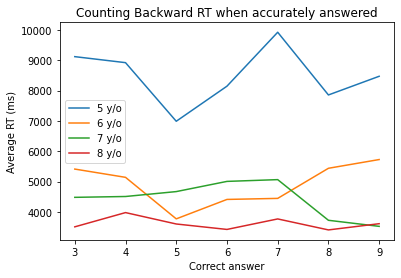

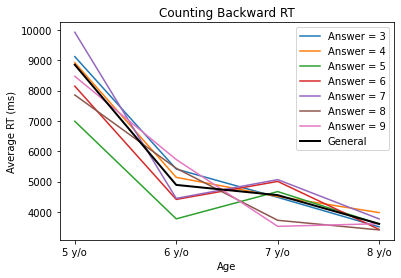

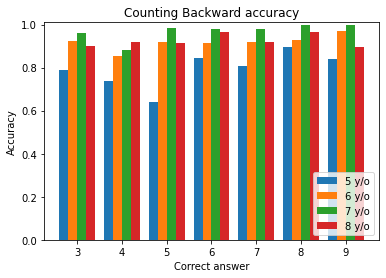

In [375]:
general_analysis("Counting Backward", "counting-true", end=19)
specific_analysis("Counting Backward", "counting-true", end=19)

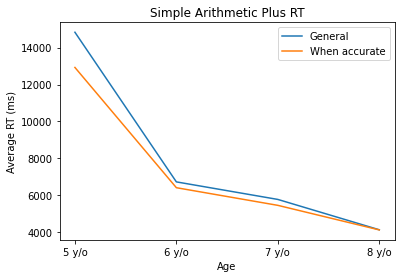

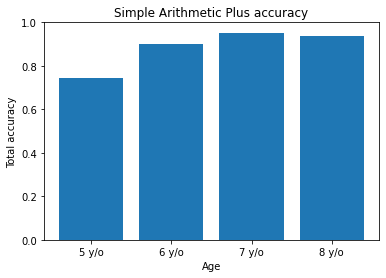

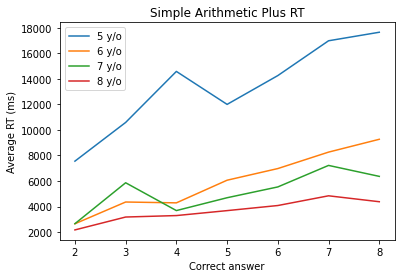

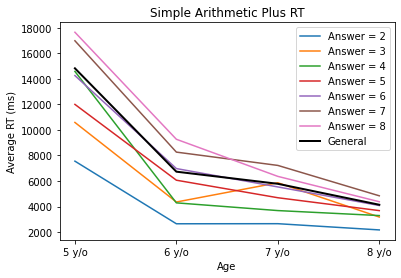

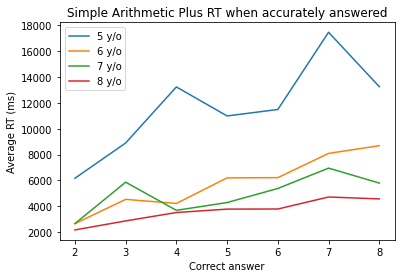

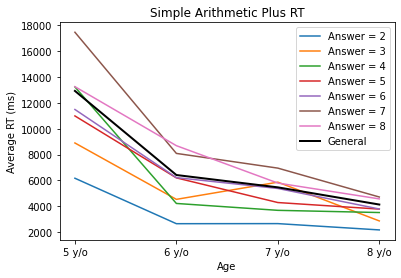

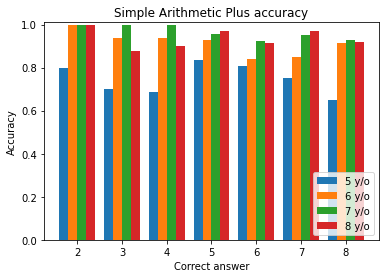

In [376]:
general_analysis("Simple Arithmetic Plus")
specific_analysis("Simple Arithmetic Plus")

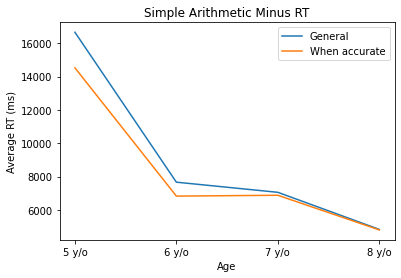

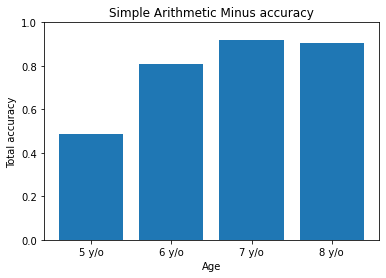

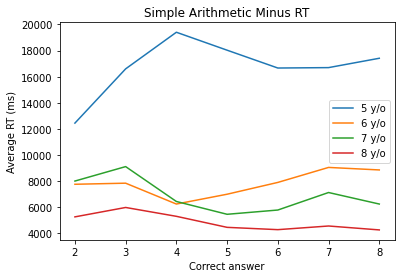

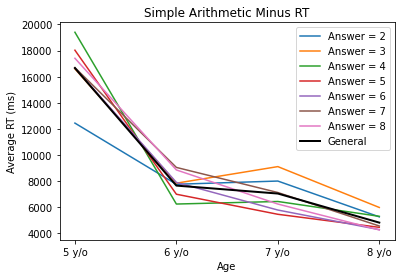

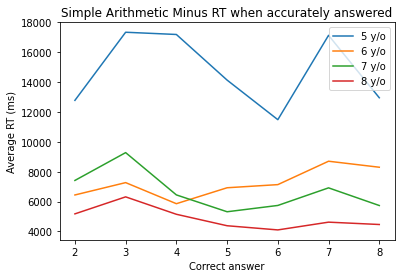

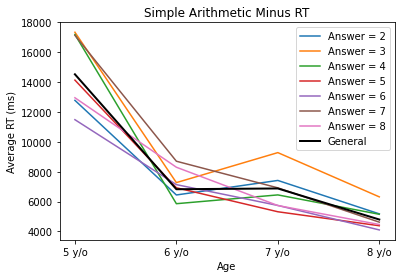

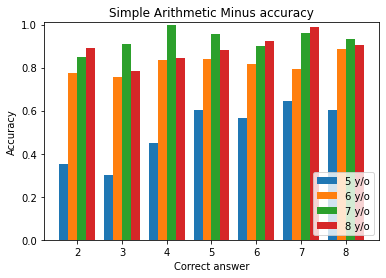

In [377]:
general_analysis("Simple Arithmetic Minus", end=20)
specific_analysis("Simple Arithmetic Minus", end=20)

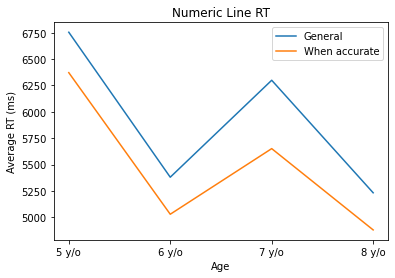

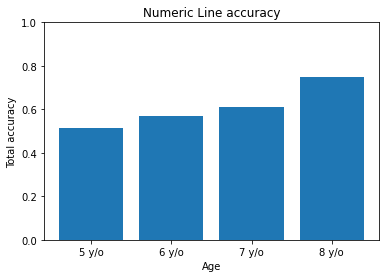

In [378]:
subtest = "Numeric Line"
subtest_lower = ""
start = 1
end = 10

dir_tables = "tables/" + subtest.replace(" ", "-").lower() + "/"
dir_charts = "charts/" + subtest.replace(" ", "-").lower() + "/"
if not os.path.exists(dir_tables):
    os.makedirs(dir_tables)
if not os.path.exists(dir_charts):
    os.makedirs(dir_charts)
    
if subtest_lower == "":
    subtest_lower = subtest.replace(" ", "-").lower()

rows = ["accuracy", "N", "RT mean", "RT std", "N_correct", "RT correct mean", "RT correct std"]
cols = [f"{age} y/o" for age in range(5,9)]
df_subtest = pd.DataFrame(index=rows, columns=cols)

for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    RTs = np.array([])
    RTs_correct = np.array([])
    for i in range(start,end+1):
        RTs = np.concatenate([RTs, df_reduced.loc[:, f"{subtest_lower}_{i}_time"].to_numpy()])
        RTs_correct = np.concatenate([RTs_correct, df_reduced.loc[(df_reduced[f"{subtest_lower}_{i}_user_score"] == 1.0) & (df_reduced[f"{subtest_lower}_{i}_user_answer"].apply(isnotnan)), f"{subtest_lower}_{i}_time"].to_numpy()])
    df_subtest.loc["N", f"{age} y/o"] = np.count_nonzero(~np.isnan(RTs))
    df_subtest.loc["RT mean", f"{age} y/o"] = np.nanmean(RTs)
    df_subtest.loc["RT std", f"{age} y/o"] = np.nanstd(RTs)
    df_subtest.loc["RT correct mean", f"{age} y/o"] = np.nanmean(RTs_correct)
    df_subtest.loc["RT correct std", f"{age} y/o"] = np.nanstd(RTs_correct)
    df_subtest.loc["N_correct", f"{age} y/o"] = len(RTs_correct)
    df_subtest.loc["accuracy", f"{age} y/o"] = len(RTs_correct) / np.count_nonzero(~np.isnan(RTs))
    
df_subtest.to_excel(dir_tables + subtest.replace(' ', '_').lower() + "_general.xlsx", index = True, float_format='%.2f')

title = subtest + " RT"
plt.title(title)
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")
plt.plot(df_subtest.loc["RT mean", :], label="General")
plt.plot(df_subtest.loc["RT correct mean", :], label="When accurate")
plt.legend()
plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_general_rt.png")
plt.show()
plt.clf()

title = subtest + " accuracy"
plt.title(title)
plt.xlabel("Age")
plt.ylabel("Total accuracy")
plt.bar([f"{age} y/o" for age in range(5,9)], df_subtest.loc["accuracy", :])
plt.ylim(0,1)
plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_general_accuracy.png")
plt.show()

3.4166666666666665
9.11111111111111
5.857142857142857
2.9285714285714284
3.727272727272727
5.466666666666667
5.857142857142857
4.315789473684211
5.466666666666667
6.135135135135135
5.044444444444444
5.404761904761905
5.973684210526316
4.54
4.365384615384615
5.044444444444444
5.536585365853658
4.54
4.833333333333333
5.523809523809524
8.285714285714286
5.2727272727272725
5.523809523809524
6.105263157894737
5.523809523809524
4.296296296296297
5.523809523809524
5.416666666666667
6.290322580645161
7.222222222222222
7.222222222222222
6.5
5.735294117647059
7.222222222222222
7.8
8.478260869565217


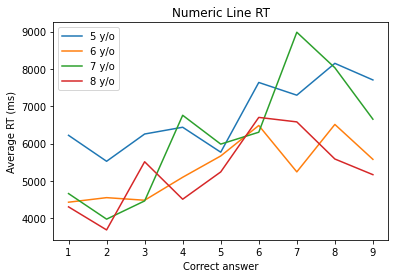

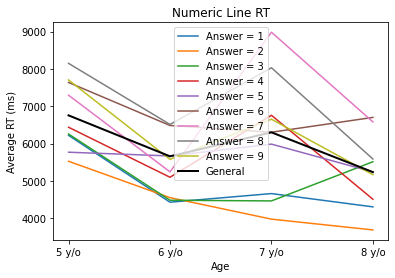

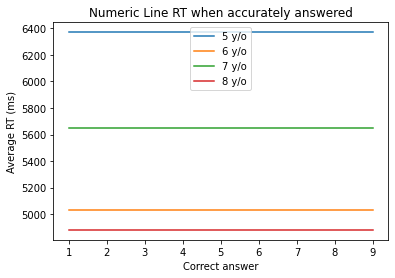

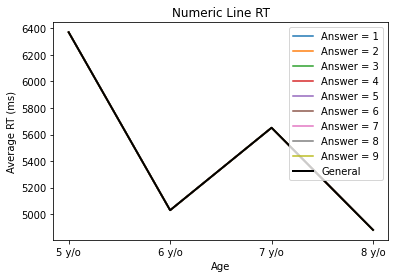

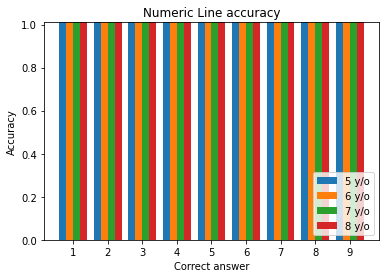

In [379]:
subtest = "Numeric Line"
subtest_lower = ""
start = 1
end = 10

dir_tables = "tables/" + subtest.replace(" ", "-").lower() + "/"
dir_charts = "charts/" + subtest.replace(" ", "-").lower() + "/"
if not os.path.exists(dir_tables):
    os.makedirs(dir_tables)
if not os.path.exists(dir_charts):
    os.makedirs(dir_charts)

if subtest_lower == "":
    subtest_lower = subtest.replace(" ", "-").lower()
min_answer_value = int(min(df.loc[:,f"{subtest_lower}_{start}_correct_answer"].value_counts().index))
max_answer_value = int(max(df.loc[:,f"{subtest_lower}_{start}_correct_answer"].value_counts().index))

rows = [correct for correct in range(min_answer_value, max_answer_value+1)] + ["General"]
cols = [f"{age} y/o RT mean" for age in range(5,9)] + [f"{age} y/o RT std" for age in range(5,9)] + [f"{age} y/o N" for age in range(5,9)] +[f"{age} y/o RT mean when accurate" for age in range(5,9)] + [f"{age} y/o RT std when accurate" for age in range(5,9)] + [f"{age} y/o N when accurate" for age in range(5,9)] + [f"{age} y/o accuracy" for age in range(5,9)]
cols.sort()
df_subtest = pd.DataFrame(index=rows, columns=cols)

for age in range(5,9):
    df_reduced = df.loc[df.age // 365.25 == float(age)]
    for correct in range(min_answer_value, max_answer_value+1):
        RTs = np.array([])
        RTs_when_accurate = np.array([])
        for i in range(start,end+1):
            RTs = np.concatenate([RTs, df_reduced.loc[df_reduced[f"{subtest_lower}_{i}_correct_answer"] == correct, f"{subtest_lower}_{i}_time"].to_numpy()])
            RTs_when_accurate = np.concatenate([RTs_when_accurate, df_reduced.loc[(df_reduced[f"{subtest_lower}_{i}_user_score"] == 1.0) & (df_reduced[f"{subtest_lower}_{i}_user_answer"].apply(isnotnan)), f"{subtest_lower}_{i}_time"].to_numpy()])
        df_subtest.loc[correct, f"{age} y/o RT mean"] = np.nanmean(RTs)
        df_subtest.loc[correct, f"{age} y/o RT std"] = np.nanstd(RTs)
        df_subtest.loc[correct, f"{age} y/o N"] = np.count_nonzero(~np.isnan(RTs))
        df_subtest.loc[correct, f"{age} y/o RT mean when accurate"] = np.nanmean(RTs_when_accurate)
        df_subtest.loc[correct, f"{age} y/o RT std when accurate"] = np.nanmean(RTs_when_accurate)
        print(len(RTs_when_accurate) / len(RTs))
        df_subtest.loc[correct, f"{age} y/o N when accurate"] = np.count_nonzero(~np.isnan(RTs_when_accurate))
        if len(RTs > 0):
            df_subtest.loc[correct, f"{age} y/o accuracy"] = np.count_nonzero(~np.isnan(RTs_when_accurate)) / np.count_nonzero(~np.isnan(RTs))
    
    RTs_general = np.array([])
    RTs_general_when_accurate = np.array([])
    for i in range(start,end+1):
        RTs_general = np.concatenate([RTs_general, df_reduced.loc[df_reduced[f"{subtest_lower}_{i}_user_answer"].apply(isnotnan), f"{subtest_lower}_{i}_time"].to_numpy()])
        RTs_general_when_accurate = np.concatenate([RTs_general_when_accurate, df_reduced.loc[(df_reduced[f"{subtest_lower}_{i}_user_score"] == 1.0) & (df_reduced[f"{subtest_lower}_{i}_user_answer"].apply(isnotnan)), f"{subtest_lower}_{i}_time"].to_numpy()])
    df_subtest.loc["General", f"{age} y/o RT mean"] = np.nanmean(RTs_general)
    df_subtest.loc["General", f"{age} y/o RT std"] = np.nanstd(RTs_general)
    df_subtest.loc["General", f"{age} y/o N"] = np.count_nonzero(~np.isnan(RTs_general))
    df_subtest.loc["General", f"{age} y/o RT mean when accurate"] = np.nanmean(RTs_general_when_accurate)
    df_subtest.loc["General", f"{age} y/o RT std when accurate"] = np.nanstd(RTs_general_when_accurate)
    df_subtest.loc["General", f"{age} y/o N when accurate"] = np.count_nonzero(~np.isnan(RTs_general_when_accurate))
    if (np.count_nonzero(~np.isnan(RTs_general)) > 0):
        df_subtest.loc["General", f"{age} y/o accuracy"] = np.count_nonzero(~np.isnan(RTs_general_when_accurate)) / np.count_nonzero(~np.isnan(RTs_general))

# ALL ANSWERS RT
plt.title(f"{subtest} RT")
plt.xlabel("Correct answer")
plt.ylabel("Average RT (ms)")
for age in range(5,9):
    data = df_subtest.loc[(df_subtest.index != "General") & (df_subtest.index != "General when accurate"), f"{age} y/o RT mean"]
    data.name = data.name[:5]
    plt.plot(data, label=f"{age} y/o")
plt.legend()
plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_all_answers_rt.png")
plt.show()
plt.clf()

# ALL ANSWERS RT ALTERNATIVE 
plt.title(f"{subtest} RT")
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")
for correct in range(min_answer_value,max_answer_value+1):
    data = df_subtest.loc[correct, [f"{age} y/o RT mean" for age in range(5,9)]]
    plt.plot([age_idx[:5] for age_idx in data.index], data.values, label=f"Answer = {correct}")
data_general = df_subtest.loc["General", [f"{age} y/o RT mean" for age in range(5,9)]]
plt.plot([age_idx[:5] for age_idx in data_general.index], data_general.values, label="General", color="black", linewidth=2)
plt.legend()
plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_all_answers_rt_alternative.png")
plt.show()
plt.clf()

cols_all_answers = [f"{age} y/o RT mean" for age in range(5,9)] + [f"{age} y/o RT std" for age in range(5,9)] + [f"{age} y/o N" for age in range(5,9)]
df_subtest_all_answers = df_subtest.loc[:, cols_all_answers]
df_subtest_all_answers.reindex(sorted(df_subtest_all_answers.columns), axis=1).to_excel(f'{dir_tables}{subtest_lower}_specific_all_answers_rt.xlsx', index = True, float_format='%.2f')

# ACCURATE ANSWERS
plt.title(f"{subtest} RT when accurately answered")
plt.xlabel("Correct answer")
plt.ylabel("Average RT (ms)")
for age in range(5,9):
    plt.plot(df_subtest.loc[(df_subtest.index != "General") & (df_subtest.index != "General when accurate"), f"{age} y/o RT mean when accurate"], label=f"{age} y/o")
plt.legend()
plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_accurate_answers_rt.png")
plt.show()
plt.clf()

# ACCURATE ANSWERS ALTERNATIVE
plt.title(f"{subtest} RT")
plt.xlabel("Age")
plt.ylabel("Average RT (ms)")
for correct in range(min_answer_value,max_answer_value+1):
    data = df_subtest.loc[correct, [f"{age} y/o RT mean when accurate" for age in range(5,9)]]
    plt.plot([age_idx[:5] for age_idx in data.index], data.values, label=f"Answer = {correct}")
data_general = df_subtest.loc["General", [f"{age} y/o RT mean when accurate" for age in range(5,9)]]
plt.plot([age_idx[:5] for age_idx in data_general.index], data_general.values, label="General", color="black", linewidth=2)
plt.legend()
plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_accurate_answers_rt_alternative.png")
plt.show()
plt.clf()

cols_accurate_answers = [f"{age} y/o RT mean when accurate" for age in range(5,9)] + [f"{age} y/o RT std when accurate" for age in range(5,9)] + [f"{age} y/o N when accurate" for age in range(5,9)]
df_subtest_accurate_answers = df_subtest.loc[:, cols_accurate_answers]
df_subtest_accurate_answers.reindex(sorted(df_subtest_accurate_answers.columns), axis=1).to_excel(f'{dir_tables}{subtest_lower}_specific_accurate_answers_rt.xlsx', index = True, float_format='%.2f')

# ACCURACY
plt.title(f"{subtest} accuracy")
plt.xlabel("Correct answer")
plt.ylabel("Accuracy")
plt.ylim(0,1.01)
x = [correct for correct in range(min_answer_value,max_answer_value+1)]
move = [-0.3,-0.1,0.1,0.3]
for age in range(5,9):
    plt.bar(np.arange(len(x)) + move[age-5], df_subtest.loc[(df_subtest.index != "General") & (df_subtest.index != "General when accurate"), f"{age} y/o accuracy"], width=0.2, label=f"{age} y/o")
plt.xticks(np.arange(len(x)), x)
plt.legend(loc='lower right')
plt.savefig(dir_charts + subtest.replace(" ", "-").lower() + "_specific_accuracy.png")
plt.show()
cols_accurate_answers = [f"{age} y/o accuracy" for age in range(5,9)]
df_subtest_accurate_answers = df_subtest.loc[:, cols_accurate_answers]
df_subtest_accurate_answers.reindex(sorted(df_subtest_accurate_answers.columns), axis=1).to_excel(f'{dir_tables}{subtest_lower}_specific_accuracy.xlsx', index = True, float_format='%.2f')
